# SK-learns make_moons dataset
## Import Dataset

In [29]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [55]:
X, y = make_moons(n_samples=1000, noise=0.1)
X[1], y[1]

(array([ 0.29830195, -0.24512776]), 1)

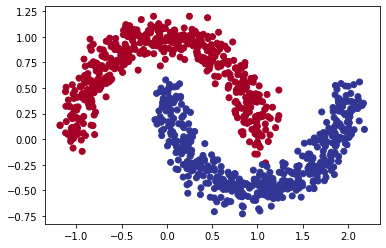

In [56]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [58]:
len(X) == len(X_train) + len(X_test)

True

## Build a basic model

In [59]:
tf.random.set_seed(42)

layers_1 =[tf.keras.layers.Dense(10, activation="relu"),
           tf.keras.layers.Dense(10,activation="relu"),
           tf.keras.layers.Dense(1, activation="sigmoid")]

model_1 = tf.keras.Sequential(layers=layers_1)

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train, epochs=25,
                        validation_data=(X_test, y_test))

Epoch 1/25
25/25 [==============================] - 1s 9ms/step - loss: 0.7725 - accuracy: 0.5113 - val_loss: 0.7586 - val_accuracy: 0.4800
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.5200 - val_loss: 0.6969 - val_accuracy: 0.4800
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.5288 - val_loss: 0.6451 - val_accuracy: 0.4950
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.5688 - val_loss: 0.6019 - val_accuracy: 0.5300
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5605 - accuracy: 0.6350 - val_loss: 0.5637 - val_accuracy: 0.6700
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.7725 - val_loss: 0.5305 - val_accuracy: 0.8300
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.8213 - val_loss: 0.5016 - val_accuracy: 0.8450
Epoch 8/25
25/25 [==

## Evaluate this model

In [60]:
def plot_history(model_history):
  """
  Helper function to automate plotting a tf history object
  """
  pd.DataFrame(model_history.history).plot(xlabel="EPOCHS", ylabel="LOSS")
  return plt.show()

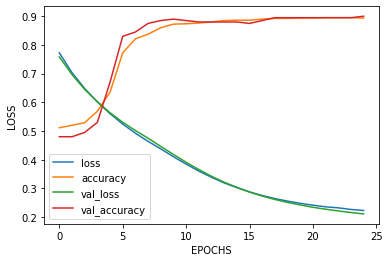

In [61]:
plot_history(history_1)

In [62]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  x_min, x_max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  return plt.show()

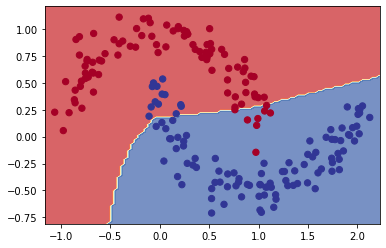

In [63]:
plot_decision_boundary(model_1, X_test, y_test)

In [64]:
acc_1 = model_1.evaluate(X_test, y_test, verbose=False)[1]
print(f"MODEL 1's TEST ACCURACY: {100*acc_1:.1f}%")

MODEL 1's TEST ACCURACY: 90.0%


## Improving on our model

In [66]:
tf.random.set_seed(42)

layers_2 =[tf.keras.layers.Dense(10, activation="relu"),
           tf.keras.layers.Dense(10,activation="relu"),
           tf.keras.layers.Dense(1, activation="sigmoid")]

model_2 = tf.keras.Sequential(layers=layers_2)

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])


history_2 = model_2.fit(X_train, y_train, epochs=25,
                        validation_data=(X_test, y_test))

Epoch 1/25
25/25 [==============================] - 1s 9ms/step - loss: 0.5827 - accuracy: 0.6875 - val_loss: 0.4714 - val_accuracy: 0.8700
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8687 - val_loss: 0.3164 - val_accuracy: 0.8850
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2563 - accuracy: 0.8925 - val_loss: 0.2054 - val_accuracy: 0.9050
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9000 - val_loss: 0.1740 - val_accuracy: 0.9150
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.1924 - accuracy: 0.9125 - val_loss: 0.1557 - val_accuracy: 0.9350
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.9312 - val_loss: 0.1315 - val_accuracy: 0.9400
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.1395 - accuracy: 0.9438 - val_loss: 0.1093 - val_accuracy: 0.9550
Epoch 8/25
25/25 [==

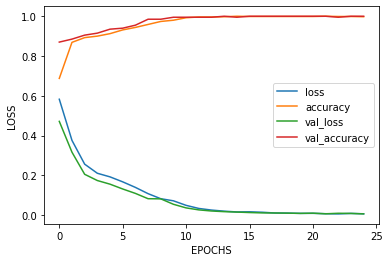

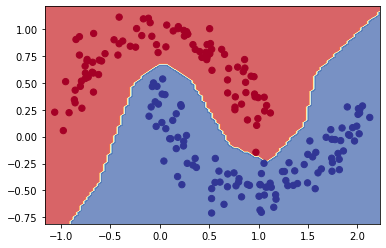


MODEL 2's TEST ACCURACY: 100.0%


In [67]:
plot_history(history_2)
print()
plot_decision_boundary(model_2, X_test, y_test)
acc_2 = model_2.evaluate(X_test, y_test, verbose=False)[1]
print(f"\nMODEL 2's TEST ACCURACY: {100*acc_2:.1f}%")

In [69]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


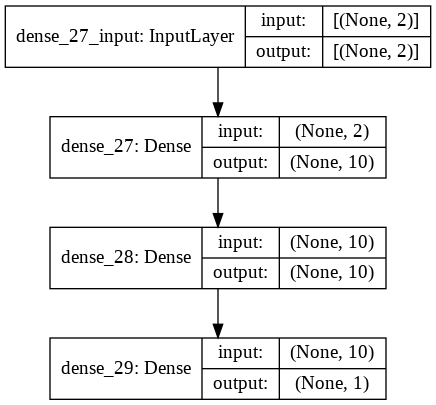

In [71]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes=True)